In [1]:
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.neighbors
import pandas as pd
import numpy as np

# 01. 机器学习概览
大多数人听到`机器学习`，往往会在脑海中勾勒出一个机器人：一个可靠的管家，或是一个可怕的终结者，这取决于你问的是谁。但是机器学习并不是未来的幻想，它已经来到我们身边了。事实上，一些特定领域已经应用机器学习几十年了，比如光学字符识别(Optical Character Recognition，OCR)。但是直到1990年代，第一个影响了数亿人的机器学习应用才真正成熟，它就是垃圾邮件过滤器(spam filter)。虽然并不是一个有自我意识的天网系统(Skynet)，垃圾邮件过滤器从技术上是符合机器学习的(它可以很好地进行学习，用户几乎不用再标记某个邮件为垃圾邮件)。后来出现了更多的数以百计的机器学习产品，支撑了更多你经常使用的产品和功能，从推荐系统到语音识别。

机器学习的起点和终点分别是什么呢？确切的讲，机器进行学习是什么意思？如果我下载了一份维基百科的拷贝，我的电脑就真的学会了什么吗？它马上就变聪明了吗？在本章中，我们首先会澄清机器学习到底是什么，以及为什么你要使用它。

然后，在我们出发去探索机器学习新大陆之前，我们要观察下地图，以便知道这片大陆上的主要地区和最明显的地标：`监督学习`vs`非监督学习`，`在线学习`vs`批量学习`，`基于实例`vs`基于模型`学习。然后，我们会学习一个典型的机器学习项目的工作流程，讨论可能碰到的难点，以及如何评估和微调一个机器学习系统。

这一章介绍了大量每个数据科学家需要牢记在心的基础概念(和习语)。第一章只是概览(唯一不含有代码的一章)，相当简单，但你要确保每一点都搞明白了，再继续进行学习本书其余章节。端起一杯咖啡，开始学习吧！

> 如果你已经知道了机器学习的所有基础概念，可以直接翻到第2章。如果你不确认，可以尝试回答本章末尾列出的问题，然后再继续。

## 1.1 什么是机器学习？
机器学习是通过编程让计算机从数据中进行学习的科学(和艺术)。

下面是一个更广义的概念：
> 机器学习是让计算机具有学习的能力，无需进行明确编程。
>   <亚瑟·萨缪尔，1959>

和一个工程性的概念：
> 计算机程序利用经验`E`学习任务`T`，性能是`P`，如果针对任务`T`的性能`P`随着经验`E`不断增长，则称为机器学习。 
>   <汤姆·米切尔，1997>

例如，你的垃圾邮件过滤器就是一个机器学习程序，它可以根据垃圾邮件(比如，用户标记的垃圾邮件)和普通邮件(非垃圾邮件，也称作ham)学习标记垃圾邮件。用来进行学习的样例称作`训练集`。每个训练样例称作`训练实例`(或`样本`)。在这个例子中，任务`T`就是标记新邮件是否是垃圾邮件，经验`E`是训练数据，性能`P`需要定义：例如，可以使用正确分类的比例。这个性能指标称为`准确率`，通常用在分类任务中。

如果你下载了一份维基百科的拷贝，你的电脑虽然有了很多数据，但不会马上变得聪明起来。因此，这不是机器学习。

## 1.2 为什么使用机器学习？
思考一下，你会如何使用传统的编程技术写一个垃圾邮件过滤器(`图1-1`)：
1. 你先观察下垃圾邮件一般都是什么样子。你可能注意到一些词或短语(比如4U、credit card、free、amazing)在邮件主题中频繁出现，也许还注意到发件人名字、邮件正文的格式，等等。
2. 你为观察到的规律写了一个检测算法，如果检测到了这些规律，程序就会标记邮件为垃圾邮件。
3. 测试程序，重复第1步和第2步，直到满足要求。

<img src="images/01_01.png" style="width:500px;"/>

这个问题并不简单，你的程序很可能会变成一长串复杂的规则，这样就会很难维护。

相反的，基于机器学习技术的垃圾邮件过滤器会自动学习哪个词和短语是垃圾邮件的预测值，通过与普通邮件比较，检测垃圾邮件中反常频次的词语格式(`图1-2`)。这个程序短得多，更易维护，也更精确。

<img src="images/01_02.png" style="width:500px;"/>

进而，如果发送垃圾邮件的人发现所有包含`4U`的邮件都被屏蔽了，可能会转而使用`For U`。使用传统方法的垃圾邮件过滤器需要更新以标记`For U`。如果发送垃圾邮件的人持续更改，你就需要被动地不停地写入新规则。

相反的，基于机器学习的垃圾邮件过滤器会自动注意到`For U`在用户手动标记垃圾邮件中的反常频繁性，然后就能自动标记垃圾邮件而无需干预了(`图1-3`)。

<img src="images/01_03.png" style="width:500px;"/>

机器学习的另一个优点是善于处理对于传统方法太复杂或是没有已知算法的问题。例如，对于语言识别：假如想写一个可以识别`one`和`two`的简单程序。你可能注意到`two`起始是一个高音(`T`)，所以可以写一个可以测量高音强度的算法，用它区分`one`和`two`。很明显，这个方法不能推广到嘈杂环境下的数百万人的数千词汇、数十种语言。(现在)最佳的方法是根据大量单词的录音，写一个可以自我学习的算法。

最后，机器学习可以帮助人类进行学习(`图1-4`)：可以检查机器学习算法已经掌握了什么(尽管对于某些算法，这样做会有点麻烦)。例如，当垃圾邮件过滤器被训练了足够多的垃圾邮件，就可以用它列出垃圾邮件预测值的单词和单词组合列表。有时，可能会发现不引人关注的关联或新趋势，有助于对问题更好的理解。

<img src="images/01_04.png" style="width:500px;"/>

使用机器学习方法挖掘大量数据，可以发现并不显著的规律。这称作`数据挖掘`。

总结一下，机器学习善于：
1. 需要进行大量手工调整或需要拥有长串规则才能解决的问题：机器学习算法通常可以简化代码、提高性能。
2. 问题复杂，传统方法难以解决：最好的机器学习方法可以找到解决方案。
3. 环境有波动：机器学习算法可以适应新数据。
4. 洞察复杂问题和大量数据。

## 1.3 机器学习系统的类型
机器学习有多种类型，可以根据如下规则进行分类：
+ 是否在人类监督下进行训练(监督，非监督，半监督和强化学习)
+ 是否可以动态渐进学习(在线学习 vs 批量学习)
+ 它们是否只是通过简单地比较新的数据点和已知的数据点，或者在训练数据中进行模式识别，以建立一个预测模型，就像科学家所做的那样(基于实例学习 vs 基于模型学习)

规则并不仅限于以上的，你可以将他们进行组合。例如，一个先进的垃圾邮件过滤器可以使用神经网络模型动态进行学习，用垃圾邮件和普通邮件进行训练。这就让它成了一个在线、基于模型、监督学习系统。

下面更仔细地学习这些规则。

### 1.3.1 监督/非监督学习
机器学习可以根据训练时监督的量和类型进行分类。主要有四类：监督学习、非监督学习、半监督学习和强化学习。

#### 1.3.1.1 监督学习
在监督学习中，用来训练算法的训练数据包含了答案，称为`标签`(`图1-5`)。

<img src="images/01_05.png" style="width:500px;"/>

一个典型的监督学习任务是分类。垃圾邮件过滤器就是一个很好的例子：用许多带有归类(垃圾邮件或普通邮件)的邮件样本进行训练，过滤器必须还能对新邮件进行分类。

另一个典型任务是预测目标数值，例如给出一些`特征`(里程数、车龄、品牌等等)称作`预测值`，来预测一辆汽车的价格。这类任务称作`回归`(`图1-6`)。要训练这个系统，你需要给出大量汽车样本，包括它们的`预测值`和`标签`(即，它们的价格)。

> 在机器学习中，一个`属性`就是一个`数据类型`(例如，`里程数`)，取决于具体问题一个`特征`会有多个含义，但通常是`属性`加上它的值(例如，`里程数=15000`)。许多人是不区分地使用`属性`和`特征`。

<img src="images/01_06.png" style="width:500px;"/>

**注意，一些回归算法也可以用来进行分类，反之亦然**。例如，逻辑回归通常用来进行分类，它可以生成一个归属某一类的可能性的值(例如，`20%`几率为垃圾邮件)。

下面是一些重要的监督学习算法(本书都有介绍)：
+ K近邻算法
+ 线性回归
+ 逻辑回归
+ 支持向量机(SVM)
+ 决策树和随机森林
+ 神经网络

#### 1.3.1.2 非监督学习
在非监督学习中，你可能猜到了，训练数据是没有加标签的(`图1-7`)。系统在没有老师的条件下进行学习。

<img src="images/01_07.png" style="width:500px;"/>

下面是一些最重要的非监督学习算法(我们会在`第8章`介绍降维)：
+ 聚类
    - K均值
    - 层次聚类分析(Hierarchical Cluster Analysis，HCA)
    - DBSCAN
+ 异常值/奇异值检测
    - One-class SVM
    - Isolation Forest
+ 可视化和降维
    - 主成分分析(Principal Component Analysis，PCA)
    - 核主成分分析
    - 局部线性嵌入(Locally-Linear Embedding，LLE)
    - t-分布邻域嵌入算法(t-distributed Stochastic Neighbor Embedding，t-SNE)
+ 关联性规则学习
    - Apriori算法
    - Eclat算法

例如，假设你有一份关于你的博客访客的大量数据。你想运行一个`聚类算法`，检测相似访客的分组(`图1-8`)。你不会告诉算法某个访客属于哪一类：它会自己找出关系，无需帮助。例如，算法可能注意到`40%`的访客是喜欢漫画书的男性，通常是晚上访问，`20%`是科幻爱好者，他们是在周末访问等等。如果你使用`层次聚类分析`，它可能还会细分每个分组为更小的组。这可以帮助你为每个分组定位博文。

<img src="images/01_08.png" style="width:500px;"/>

可视化算法也是极佳的非监督学习案例：给算法大量复杂的且不加标签的数据，算法输出数据的2D或3D图像(`图1-9`)。算法会试图保留数据的结构(即尝试保留输入的独立聚类，避免在图像中重叠)，这样就可以明白数据是如何组织起来的，也许还能发现隐藏的规律。

<img src="images/01_09.png" style="width:500px;"/>

> 注意动物是与汽车分开的，马和鹿很近、与鸟距离远，以此类推

与此有关联的任务是`降维`，`降维`的目的是简化数据、但是不能失去大部分信息。做法之一是合并若干相关的特征。例如，汽车的里程数与车龄高度相关，降维算法就会将它们合并成一个，表示汽车的磨损。这叫做`特征提取`。

> 在用训练集训练机器学习算法(比如监督学习算法)时，最好对训练集进行降维。这样可以运行的更快，占用的硬盘和内存空间更少，有些情况下性能也更好。

另一个重要的非监督任务是`异常检测`(anomaly detection)。例如，检测异常的信用卡转账以防欺诈，检测制造缺陷，或者在训练之前自动从训练数据集去除异常值。异常检测的系统使用正常值训练的，当它碰到一个新实例，它可以判断这个新实例是像正常值还是异常值(`图1-10`)。

<img src="images/01_10.png" style="width:500px;"/>

最后，另一个常见的非监督任务是`关联规则学习`，它的目标是挖掘大量数据以发现属性间有趣的关系。例如，假设你拥有一个超市。在销售日志上运行关联规则，可能发现买了烧烤酱和薯片的人也会买牛排。因此，你可以将这些商品放在一起。

#### 1.3.1.3 半监督学习
一些算法可以处理部分带标签的训练数据，通常是大量不带标签数据加上小部分带标签数据。这称作`半监督学习`(`图1-11`)。

一些图片存储服务，比如Google Photos，是半监督学习的好例子。一旦你上传了所有家庭相片，它就能自动识别相同的人A出现了相片1、5、11中，另一个人B出现在了相片2、5、7中。这是算法的`非监督部分`(聚类)。现在系统需要的就是你告诉这两个人是谁。只要给每个人一个标签，算法就可以命名每张照片中的每个人，特别适合搜索照片。

<img src="images/01_11.png" style="width:500px;"/>

多数半监督学习算法是非监督和监督算法的结合。例如，深度信念网络(deep belief networks)是基于被称为互相叠加的受限玻尔兹曼机(restricted Boltzmann machines，RBM)的非监督组件。RBM是先用非监督方法进行训练，再用监督学习方法进行整个系统微调。

#### 1.3.1.4 强化学习
`强化学习`非常不同。学习系统在这里被称为智能体(agent)，可以对环境进行观察，选择和执行动作，获得奖励(负奖励是惩罚，见`图1-12`)。然后它必须自己学习哪个是最佳方法(称为`策略`，`policy`)，以得到长久的最大奖励。策略决定了智能体在给定情况下应该采取的行动。

<img src="images/01_12.png" style="width:500px;"/>

例如，许多机器人运行强化学习算法以学习如何行走。DeepMind的`AlphaGo`也是强化学习的例子：它在2016年三月击败了世界围棋冠军李世石。它是通过分析数百万盘棋局学习制胜策略，然后自己和自己下棋。要注意，在比赛中机器学习是关闭的；`AlphaGo`只是使用它学会的策略。



### 1.3.2 批量和在线学习
另一个用来分类机器学习的准则是，它是否能从导入的数据流进行持续学习。

#### 1.3.2.1 批量学习
在批量学习中，系统不能进行持续学习：必须用所有可用数据进行训练。这通常会占用大量时间和计算资源，所以一般是线下做的。首先是进行训练，然后部署在生产环境且停止学习，它只是使用已经学到的策略。这称为`离线学习`。

如果你想让一个批量学习系统明白新数据(例如垃圾邮件的新类型)，就需要从头训练一个系统的新版本，使用全部数据集(不仅有新数据也有老数据)，然后停掉老系统，换上新系统。

幸运的是，训练、评估、部署一套机器学习的系统的整个过程可以自动进行(见`图1-3`)，所以即便是批量学习也可以适应改变。只要有需要，就可以方便地更新数据、训练一个新版本。

这个方法很简单，通常可以满足需求，但是用全部数据集进行训练会花费大量时间，所以一般是每24小时或每周训练一个新系统。如果系统需要快速适应变化的数据(比如，预测股价变化)，就需要一个响应更及时的方案。

另外，用全部数据训练需要大量计算资源(CPU、内存空间、磁盘空间、磁盘I/O、网络I/O等等)。如果你有大量数据，并让系统每天自动从头开始训练，就会开销很大。如果数据量巨大，甚至无法使用批量学习算法。

最后，如果你的系统需要自动学习，但是资源有限(比如，一台智能手机或火星车)，携带大量训练数据、每天花费数小时的大量资源进行训练是不实际的。

幸运的是，对于上面这些情况，还有一个更佳的方案可以进行持续学习。

#### 1.3.2.2 在线学习
在`在线学习`中，是用数据实例持续地进行训练，可以一次一个或一次几个实例(称为`小批量`)。每个学习步骤都很快且廉价，所以系统可以动态地学习到达的新数据(见`图1-13`)。

<img src="images/01_13.png" style="width:500px;"/>

在线学习很适合系统接收连续流的数据(比如，股票价格)，且需要自动对改变作出调整。如果计算资源有限，在线学习是一个不错的方案：一旦在线学习系统学习了新的数据实例，它就不再需要这些数据了，所以扔掉这些数据(除非你想滚回到之前的一个状态，再次使用数据)。这样可以节省大量的空间。

在线学习算法也可以当机器的内存存不下大量数据集时，用来训练系统(这称作`核外学习`，`out-of-core learning`)。算法加载部分的数据，用这些数据进行训练，重复这个过程，直到用所有数据都进行了训练(`图1-14`)。

> 这个整个过程通常是离线完成的(即，不在部署的系统上)，所以在线学习这个名字会让人疑惑。可以把它想成持续学习

<img src="images/01_14.png" style="width:500px;"/>

在线学习系统的一个重要参数是，它们可以多快地适应数据的改变：这被称为`学习速率`。如果你设定一个高学习速率，系统就可以快速适应新数据，但是也会快速忘记老数据(你可不想让垃圾邮件过滤器只标记最新的垃圾邮件种类)。相反的，如果你设定的学习速率低，系统的惰性就会强：即，它学的更慢，但对新数据中的噪声或没有代表性的数据点结果不那么敏感。

在线学习的挑战之一是，如果坏数据被用来进行训练，系统的性能就会逐渐下滑。如果这是一个部署的系统，用户就会注意到。例如，坏数据可能来自失灵的传感器或机器人，或某人向搜索引擎传入垃圾信息以提高搜索排名。要减小这种风险，你需要密集监测，如果检测到性能下降，要快速关闭(或是回滚到一个之前的状态)。你可能还要监测输入数据，对反常数据做出反应(比如，使用异常检测算法)。

### 1.3.3 基于实例 vs 基于模型学习
另一种分类机器学习的方法是判断它们是如何进行归纳推广的。大多机器学习任务是关于预测的。这意味着给定一定数量的训练样本，系统需要能推广到之前没见到过的样本。对训练数据集有很好的性能还不够，真正的目标是对新实例预测的性能。

有两种主要的归纳方法：`基于实例`学习和`基于模型`学习。

#### 1.3.3.1 基于实例学习
也许最简单的学习形式就是用记忆学习。如果用这种方法做一个垃圾邮件检测器，只需标记所有和用户标记的垃圾邮件相同的邮件。这个方法不差，但肯定不是最好的。

不仅能标记和已知的垃圾邮件相同的邮件，你的垃圾邮件过滤器也要能标记类似垃圾邮件的邮件。这就需要测量两封邮件的相似性。一个(简单的)相似度测量方法是统计两封邮件包含的相同单词的数量。如果一封邮件含有许多垃圾邮件中的词，就会被标记为垃圾邮件。

这被称作基于实例学习：系统先用记忆学习案例，然后使用相似度测量推广到新的例子(`图1-15`)。

<img src="images/01_15.png" style="width:500px;"/>

#### 1.3.3.2 基于模型学习
另一种从样本集进行归纳的方法是建立这些样本的模型，然后使用这个模型进行预测。这称作基于模型学习(`图1-16`)。

<img src="images/01_16.png" style="width:500px;"/>

例如，你想知道钱是否能让人快乐，你从`OECD`网站下载了`Better Life Index`指数数据，还从`IMF`下载了人均`GDP`数据。`表1-1`展示了摘要。

<img src="images/t_01_01.png" style="width:300px;"/>

用一些国家的数据画图(`图1-17`)。

<img src="images/01_17.png" style="width:500px;"/>

确实能看到趋势！尽管数据有噪声(即，部分随机)，看起来生活满意度是随着人均GDP的增长线性提高的。所以，你决定生活满意度建模为人均GDP的线性函数。这一步称作`模型选择`：你选一个生活满意度的线性模型，只有一个属性，人均GDP(`公式1-1`)。

+ $life\_satisfaction = \theta_0 + \theta_1 * GDP\_per\_capita$

这个模型有两个参数$\theta_0$和$\theta_1$。通过调整这两个参数，你可以使你的模型表示任何线性函数，见`图1-18`。

<img src="images/01_18.png" style="width:500px;"/>

在使用模型之前，你需要确定$\theta_0$和$\theta_1$。如何能知道哪个值可以使模型的性能最佳呢？要回答这个问题，你需要指定性能的量度。你可以定义一个`实用函数`(或`拟合函数`)用来测量模型是否够好，或者你可以定义一个`代价函数`来测量模型有多差。对于线性回归问题，人们一般是用代价函数测量线性模型的预测值和训练样本的距离差，目标是使距离差最小。

接下来就是线性回归算法，你用训练样本训练算法，算法找到使线性模型最拟合数据的参数。这称作`模型训练`。在我们的例子中，算法得到的参数值是$\theta_0 = 4.85$和$\theta_1 = 4.91×10-5$。

现在模型已经最紧密地拟合到训练数据了，见`图1-19`。

<img src="images/01_19.png" style="width:500px;"/>

最后，可以准备运行模型进行预测了。例如，假如你想知道塞浦路斯人有多幸福，但`OECD`没有它的数据。幸运的是，你可以用模型进行预测：查询塞浦路斯的人均GDP，为22587美元，然后应用模型得到生活满意度，后者的值在$4.85 + 22587 × 4.91 × 10-5 = 5.96$左右。

为了激起你的兴趣，`案例1-1`展示了加载数据、准备、创建散点图的Python代码，然后训练线性模型并进行预测。

`案例1-1`，使用`Scikit-Learn`训练并运行线性模型。

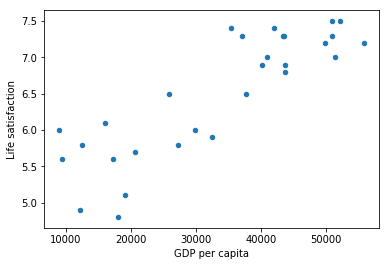

In [2]:
def prepare_country_stats(oecd_bli: object, gdp_per_capita: object) -> object:
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data 
oecd_bli = pd.read_csv("datasets/oecd_bli_2015.csv", thousands=',') 
gdp_per_capita = pd.read_csv("datasets/gdp_per_capita.csv", thousands=',', 
                             delimiter='\t', encoding='latin1', na_values="n/a")

# Prepare the data 
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 
X = np.c_[country_stats["GDP per capita"]] 
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data 
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction') 
plt.show()

In [3]:
# Select a linear model 
clf = sklearn.linear_model.LinearRegression()

# Train the model 
clf.fit(X, y)

# Make a prediction for Cyprus 
X_new = [[22587]] 
# Cyprus' GDP per capita 
clf.predict(X_new)

array([[5.96242338]])

> 如果你之前接触过基于实例学习算法，你会发现斯洛文尼亚的人均GDP(20732 美元)和塞浦路斯差距很小，OECD数据上斯洛文尼亚的生活满意度是5.7，就可以预测塞浦路斯的生活满意度也是5.7。如果放大一下范围，看一下接下来两个临近的国家，你会发现葡萄牙和西班牙的生活满意度分别是5.1和6.5。对这三个值进行平均得到5.77，就和基于模型的预测值很接近。这个简单的算法叫做`k近邻回归`(这个例子中，$k=3$)。
>
> 在前面的代码中替换线性回归模型为K近邻模型，只需更换下面一行：
> ```python
> clf = sklearn.linear_model.LinearRegression()
> ```
> 
> 为：
> ```python
> clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
> ```

如果一切顺利，你的模型就可以作出好的预测。如果不能，你可能需要使用更多的属性(就业率、健康、空气污染等等)，获取更多更好的训练数据，或选择一个更好的模型(比如，多项式回归模型)。

总结一下：
+ 研究数据
+ 选择模型
+ 用训练数据进行训练(即，学习算法搜寻模型参数值，使代价函数最小)
+ 最后，使用模型对新案例进行预测(这称作推断)，但愿这个模型推广效果不差

这就是一个典型的机器学习项目。在第2章中，你会第一手地接触一个完整的项目。

我们已经学习了许多关于基础的内容：你现在知道了机器学习是关于什么的，为什么它这么有用，最常见的机器学习的分类，典型的项目工作流程。现在，让我们看一看学习中会发生什么错误，导致不能做出准确的预测。

## 1.4 机器学习的主要挑战
简而言之，因为你的主要任务是选择一个学习算法并用一些数据进行训练，会导致错误的两件事就是`错误的算法`和`错误的数据`。我们从错误的数据开始。

### 1.4.1 训练数据量不足
要让一个蹒跚学步的孩子知道什么是苹果，需要做的就是指着一个苹果说`苹果`(可能需要重复这个过程几次)。现在这个孩子就能认识所有形状和颜色的苹果。真是个天才！

机器学习还达不到这个程度；需要大量数据，才能让多数机器学习算法正常工作。即便对于非常简单的问题，一般也需要数千的样本，对于复杂的问题，比如图像或语音识别，你可能需要数百万的样本(除非你能重复使用部分存在的模型)。

> **数据的非理性效果/The Unreasonable Effectiveness of Data**  
> 在一篇2001年发表的[著名论文](http://ucrel.lancs.ac.uk/acl/P/P01/P01-1005.pdf)中，微软研究员`Michele Banko`和`Eric Brill`展示了不同的机器学习算法，包括非常简单的算法，一旦有了大量数据进行训练，在进行去除语言歧义的测试中几乎有相同的性能(见`图1-20`)。
> 
> <img src="images/01_20.png" style="width:500px;"/>
> 
> 论文作者说："结果说明，我们可能需要重新考虑在`算法开发`vs`语料库`发展上花费时间和金钱的取舍。"
> 
> 对于复杂问题，数据比算法更重要的主张在2009年由`Norvig`发表的论文《The Unreasonable Effectiveness of Data》得到了进一步的推广。但是，应该注意到，小型和中型的数据集仍然是非常常见的，获得额外的训练数据并不总是轻易和廉价的，所以不要抛弃算法。

### 1.4.2 没有代表性的训练数据
为了更好地进行归纳推广，让训练数据对新数据具有代表性是非常重要的。无论你用的是基于实例学习或基于模型学习，这点都很重要。

例如，我们之前用来训练线性模型的国家集合不够具有代表性：缺少了一些国家。`图1-21`展示了添加这些缺失国家之后的数据。

<img src="images/01_21.png" style="width:500px;"/>

如果你用这份数据训练线性模型，得到的是实线，旧模型用虚线表示。可以看到，添加几个国家不仅可以显著地改变模型，它还说明如此简单的线性模型可能永远不会达到很好的性能。貌似非常富裕的国家没有中等富裕的国家快乐(事实上，非常富裕的国家看起来更不快乐)，相反的，一些贫穷的国家看上去比富裕的国家还幸福。

使用了没有代表性的数据集，我们训练了一个不可能得到准确预测的模型，特别是对于非常贫穷和非常富裕的国家。

使用具有代表性的训练集对于推广到新案例是非常重要的。但是做起来比说起来要难：如果样本太小，就会有`样本噪声`(即，会有一定概率包含没有代表性的数据)，但是即使是非常大的样本也可能没有代表性，如果取样方法错误的话。这叫做`样本偏差`。

> **一个样本偏差的著名案例**
> 
> 也许关于样本偏差最有名的案例发生在1936年兰登和罗斯福的美国大选：《文学文摘》做了一个非常大的民调，给1000万人邮寄了调查信。得到了240万回信，非常有信心地预测兰登会以`57%`赢得大选。然而，罗斯福赢得了`62%`的选票。错误发生在《文学文摘》的取样方法：
> + 首先，为了获取发信地址，《文学文摘》使用了电话黄页、杂志订阅用户、俱乐部会员等相似的列表。所有这些列表都偏向于富裕人群，他们都倾向于投票给共和党(即`兰登`)。
> + 第二，只有`25%`的回答了调研。这就又一次引入了样本偏差，它排除了不关心政治的人、不喜欢《文学文摘》的人，和其它关键人群。这种特殊的样本偏差称作`无应答偏差`。
> 
> 下面是另一个例子：假如你想创建一个能识别放克音乐(`Funk Music`, 别名骚乐)视频的系统。建立训练集的方法之一是在YouTube上搜索`放克音乐`，使用搜索到的视频。但是这样就假定了YouTube的搜索引擎返回的视频集，是对YouTube上的所有放克音乐有代表性的。事实上，搜索结果会偏向于人们歌手(如果你居住在巴西，你会得到许多`funk carioca`视频，它们和`James Brown`的截然不同)。从另一方面来讲，你怎么得到一个大的训练集呢？

### 1.4.3 低质量数据
很明显，如果训练集中的错误、异常值和噪声(错误测量引入的)太多，系统检测出潜在规律的难度就会变大，性能就会降低。花费时间对训练数据进行清理是十分重要的。事实上，大多数据科学家的一大部分时间是做清洗工作的。例如：
+ 如果一些实例是明显的异常值，最好删掉它们或尝试手工修改错误；
+ 如果一些实例缺少特征(比如，你的$5%$的顾客没有说明年龄)，你必须决定是否忽略这个属性、忽略这些实例、填入缺失值(比如，年龄中位数)，或者训练一个含有这个特征的模型和一个不含有这个特征的模型，等等。

### 1.4.4 不相关的特征
俗语说：进来的是垃圾，出去的也是垃圾。你的系统只有在训练数据包含足够相关特征、非相关特征不多的情况下，才能进行学习。机器学习项目成功的关键之一是用好的特征进行训练。这个过程称作`特征工程`，包括：
+ 特征选择：在所有存在的特征中选取最有用的特征进行训练。
+ 特征提取：组合存在的特征，生成一个更有用的特征（如前面看到的，可以使用降维算法）。
+ 收集新数据创建新特征。

现在，我们已经看过了许多坏数据的例子，接下来看几个坏算法的例子。

### 1.4.5 过拟合训练数据
如果你在外国游玩，当地的出租车司机多收了你的钱。你可能会说这个国家所有的出租车司机都是小偷。过度归纳是我们人类经常做的，如果我们不小心，机器也会犯同样的错误。在机器学习中，这称作`过拟合`：意思是说，模型在训练数据上表现很好，但是推广效果不好。

`图1-22`展示了一个高阶多项式生活满意度模型，它大大过拟合了训练数据。即使它比简单线性模型在训练数据上表现更好，你会相信它的预测吗？

<img src="images/01_22.png" style="width:500px;"/>

复杂的模型，比如深度神经网络，可以检测数据中的细微规律，但是如果训练集有噪声，或者训练集太小(太小会引入样本噪声)，模型就会去检测噪声本身的规律。很明显，这些规律不能推广到新实例。例如，假如你用更多的属性训练生活满意度模型，包括不包含信息的属性，比如国家的名字。如此一来，复杂的模型可能会检测出训练集中名字有`w`字母的国家的生活满意度大于7：新西兰(7.3)，挪威(7.4)，瑞典(7.2)和瑞士(7.5)。你能相信这个`W-满意度法则`推广到卢旺达和津巴布韦吗？很明显，这个规律只是训练集数据中偶然出现的，但是模型不能判断这个规律是真实的、还是噪声的结果。

> 过拟合发生在相对于训练数据的量和噪声，模型过于复杂的情况。可能的解决方案有：
> + 简化模型，可以通过选择一个参数更少的模型(比如使用线性模型，而不是高阶多项式模型)、减少训练数据的属性数、或限制一下模型
> + 收集更多的训练数据
> + 减小训练数据的噪声(比如，修改数据错误和去除异常值)

限定一个模型以让它更简单，降低过拟合的风险被称作`正则化`(regularization)。例如，我们之前定义的线性模型有两个参数，$\theta_0$和$\theta_1$。它给了学习算法两个自由度以让模型适应训练数据：可以调整截距$\theta_0$和斜率$\theta_1$。如果强制$\theta_1 = 0$，算法就只剩一个自由度，拟合数据就会更为困难：能做的只是将在线下移动，尽可能地靠近训练实例，结果会在平均值附近。这就是一个非常简单的模型！如果我们允许算法可以修改$\theta_1$，但是只能在一个很小的范围内修改，算法的自由度就会介于1和2之间。它要比两个自由度的模型简单，比1个自由度的模型要复杂。你的目标是在完美拟合数据和保持模型简单性上找到平衡，确保算法的推广效果。

`图1-23`展示了三个模型：虚线表示用缺失部分国家的数据训练的原始模型，短划线是我们的第二个用所有国家训练的模型，实线模型的训练数据和第一个相同，但进行了正则化限制。你可以看到正则化强制模型有一个小的斜率，它对训练数据的拟合不是那么好，但是对新样本的推广效果好。

<img src="images/01_23.png" style="width:500px;"/>

正则化的度可以用一个`超参数`(hyperparameter)控制。超参数是一个学习算法的参数(而不是模型的)。这样，它是不会被学习算法本身影响的，它优于训练，在训练中是保持不变的。如果你设定的超参数非常大，就会得到一个几乎是平的模型(斜率接近于0)；这种学习算法几乎肯定不会过拟合训练数据，但是也很难得到一个好的解。调节超参数是创建机器学习算法非常重要的一部分(下一章你会看到一个详细的例子)。

### 1.4.6 欠拟合训练数据
你可能猜到了，`欠拟合`是和`过拟合`相对的：当你的模型过于简单时就会发生。例如，生活满意度的线性模型倾向于欠拟合；现实要比这个模型复杂的多，所以预测很难准确，即使在训练样本上也很难准确。

解决这个问题的选项包括：
+ 选择一个更强大的模型，带有更多参数
+ 用更好的特征训练学习算法(特征工程)
+ 减小对模型的限制(比如，减小正则化超参数)

### 1.4.7 回顾
现在，你已经知道了很多关于机器学习的知识。然而，学过了这么多概念，你可能会感到有些迷失，所以让我们退回去，回顾一下重要的：
+ 机器学习是让机器通过学习数据对某些任务做得更好，而不使用确定的代码规则。
+ 有许多不同类型的机器学习系统：监督或非监督，批量或在线，基于实例或基于模型，等等。
+ 在机器学习项目中，我们从训练集中收集数据，然后对学习算法进行训练。如果算法是基于模型的，就调节一些参数，让模型拟合到训练集(即，对训练集本身作出好的预测)，然后希望它对新样本也能有好预测。如果算法是基于实例的，就是用记忆学习样本，然后用相似度推广到新实例。
+ 如果训练集太小、数据没有代表性、含有噪声、或掺有不相关的特征(垃圾进，垃圾出)，系统的性能不会好。最后，模型不能太简单(会发生欠拟合)或太复杂(会发生过拟合)。

还差最后一个主题要学习：训练完了一个模型，你不只希望将它推广到新样本。如果你想评估它，那么还需要作出必要的微调。一起来看一看。

## 1.5 测试和确认
**第二版作了较大改动**

要知道一个模型推广到新样本的效果，唯一的办法就是真正的进行试验。一种方法是将模型部署到生产环境，观察它的性能。这么做可以，但是如果模型的性能很差，就会引起用户抱怨，这不是最好的方法。

更好的选项是将你的数据分成两个集合：`训练集`和`测试集`。正如它们的名字，用训练集进行训练，用测试集进行测试。对新样本的错误率称作`推广错误`(或样本外错误)，通过模型对测试集的评估，你可以预估这个错误。这个值可以告诉你，你的模型对新样本的性能。

如果训练错误率低(即，你的模型在训练集上错误不多)，但是推广错误率高，意味着模型对训练数据过拟合。

> 一般使用 80% 的数据进行训练，保留20%用于测试。

### 1.5.1 超参数调整和模型选择
因此，评估一个模型很简单：只要使用测试集。现在假设你在两个模型之间犹豫不决(比如一个线性模型和一个多项式模型)：如何做决定呢？一种方法是两个都训练，然后比较在测试集上的效果。

现在假设线性模型的效果更好，但是你想做一些正则化以避免过拟合。问题是：如何选择正则化超参数的值？一种选项是用100个不同的超参数训练100个不同的模型。假设你发现最佳的超参数的推广错误率最低，比如只有`5%`。然后就选用这个模型作为生产环境，但是实际中性能不佳，误差率达到了`15%`。发生了什么呢？

答案在于，你在测试集上多次测量了推广误差率，调整了模型和超参数，以使模型最适合这个集合。这意味着模型对新数据的性能不会高。

这个问题通常的解决方案是，再保留一个集合，称作`验证集合`。用训练集和多个超参数训练多个模型，选择在验证集上有最佳性能的模型和超参数。当你对模型满意时，用测试集再做最后一次测试，以得到推广误差率的预估。

为了避免`浪费`过多训练数据在验证集上，通常的办法是使用`交叉验证`：训练集分成互补的子集，每个模型用不同的子集训练，再用剩下的子集验证。一旦确定模型类型和超参数，最终的模型使用这些超参数和全部的训练集进行训练，用测试集得到推广误差率。

### 1.5.2 Data Mismatch
In some cases, it is easy to get a large amount of data for training, but it is not perfectly representative of the data that will be used in production. 

For example, suppose you want to create a mobile app to take pictures of flowers and automatically determine their species. You can easily download millions of pictures of flowers on the web, but they won’t be perfectly representative of the pictures that will actually be taken using the app on a mobile device. Perhaps you only have 10000 representative pictures (i.e., actually taken with the app). 

In this case, the most important rule to remember is that the validation set and the test must be as representative as possible of the data you expect to use in production, so they should be composed exclusively of representative pictures: you can shuffle them and put half in the validation set, and half in the test set (making sure that no duplicates or near-duplicates end up in both sets). After training your model on the web pictures, if you observe that the performance of your model on the validation set is disappointing, you will not know whether this is because your model has overfit the training set, or whether this is just due to the mismatch between the web pictures and the mobile app pictures. 

One solution is to hold out part of the training pictures (from the web) in yet another set that Andrew Ng calls the train-dev set. After the model is trained (on the training set, not on the train-dev set), you can evaluate it on the train-dev set: if it performs well, then the model is not overfitting the training set, so if performs poorly on the validation set, the problem must come from the data mismatch. You can try to tackle this problem by preprocessing the web images to make them look more like the pictures that will be taken by the mobile app, and then retraining the model. Conversely, if the model performs poorly on the train-dev set, then the model must have overfit the training set, so you should try to simplify or regularize the model, get more training data and clean up the training data, as discussed earlier.


> **没有免费午餐公理**
> 
> 模型是观察的简化版本。简化意味着舍弃无法进行推广的表面细节。但是，要确定舍弃什么数据、保留什么数据，必须要做假设。例如，线性模型的假设是数据基本上是线性的，实例和模型直线间的距离只是噪音，可以放心忽略。
> 
> 在一篇 1996 年的[著名论文](https://www.zabaras.com/Courses/BayesianComputing/Papers/lack_of_a_priori_distinctions_wolpert.pdf)中，`David Wolpert`证明，如果完全不对数据做假设，就没有理由选择一个模型而不选另一个。这称作没有免费午餐(NFL)公理。对于一些数据集，最佳模型是线性模型，而对其它数据集是神经网络。没有一个模型可以保证效果更好(如这个公理的名字所示)。确信的唯一方法就是测试所有的模型。因为这是不可能的，实际中就必须要做一些对数据合理的假设，只评估几个合理的模型。例如，对于简单任务，你可能是用不同程度的正则化评估线性模型，对于复杂问题，你可能要评估几个神经网络模型。